In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'C:\Users\rania\Desktop\password_resources/password_data.sqlite')

In [4]:
data  = pd.read_sql_query(
    "SELECT * FROM Users ",
    con
)

In [5]:
data.drop(['index'],axis=1,inplace=True)

In [6]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [9]:
data.isnull().any().sum()

0

In [10]:
data.dtypes

password    object
strength     int64
dtype: object

In [11]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [12]:
#semantic analysis : how many pwd only have numerical/alphabetical features 
# how many pwd have capital letters etc..

In [13]:
type(data['password'][0])

str

In [14]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [15]:
data['password'].str.isnumeric().sum()

26

In [16]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [17]:
data['password'].str.isupper().sum()

1506

In [18]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [19]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [20]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [21]:
#check if title case meaning first capital and the rest not 
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [22]:
data.count()

password    100000
strength    100000
dtype: int64

In [23]:
import string 

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def find_semantics(row):
    for char in row :
        if char in string.punctuation :
            return 1
        else :
            pass

In [26]:
data[data['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [27]:
len(data['password'][0])

9

In [28]:
data['length']=data['password'].str.len()

In [29]:
def freq_lowercase(pwd):
    return len([char for char in pwd if char.islower()])/len(pwd)

In [30]:
def freq_uppercase(pwd):
    return len([char for char in pwd if char.isupper()])/len(pwd)

In [31]:
def freq_numerical_case(pwd):
    return len([char for char in pwd if char.isdigit()])/len(pwd)

In [32]:
data['freq_lowercase']=np.round(data["password"].apply(freq_lowercase),3)

In [33]:
data['freq_uppercase']=np.round(data["password"].apply(freq_uppercase),3)

In [34]:
data['freq_numerical']=np.round(data["password"].apply(freq_numerical_case),3)

In [35]:
data.head(3)

,password,strength,length,freq_lowercase,freq_uppercase,freq_numerical
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [36]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)

In [37]:
data['special_char_freq']=np.round(data["password"].apply(freq_numerical_case),3)

In [38]:
data.head(3)

,password,strength,length,freq_lowercase,freq_uppercase,freq_numerical,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.583
2,soporte13,1,9,0.778,0.0,0.222,0.222


In [39]:
data['special_char_freq']=data['special_char_freq']/data['length']

In [40]:
data.head(3)

,password,strength,length,freq_lowercase,freq_uppercase,freq_numerical,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.074111
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.048583
2,soporte13,1,9,0.778,0.0,0.222,0.024667


performing descriptive statistics for every feature

In [41]:
data[['length','strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [42]:
data.columns

Index(['password', 'strength', 'length', 'freq_lowercase', 'freq_uppercase',
       'freq_numerical', 'special_char_freq'],
      dtype='object')

In [43]:
cols = ['length', 'freq_lowercase', 'freq_uppercase',
       'freq_numerical', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


freq_lowercase
         freq_lowercase                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


freq_uppercase
         freq_uppercase                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


freq_numerical
         freq_numerical                        
                    min    max      mean median
strength                            

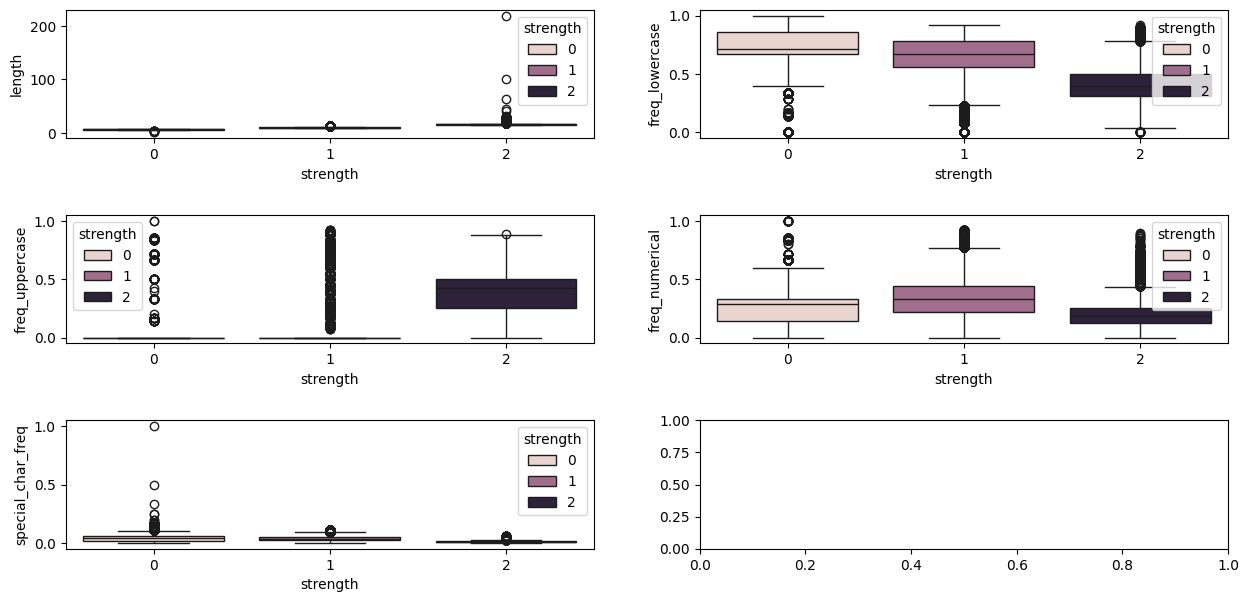

In [44]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='freq_lowercase' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='freq_uppercase' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='freq_numerical' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [45]:
data.columns

Index(['password', 'strength', 'length', 'freq_lowercase', 'freq_uppercase',
       'freq_numerical', 'special_char_freq'],
      dtype='object')

In [46]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [47]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

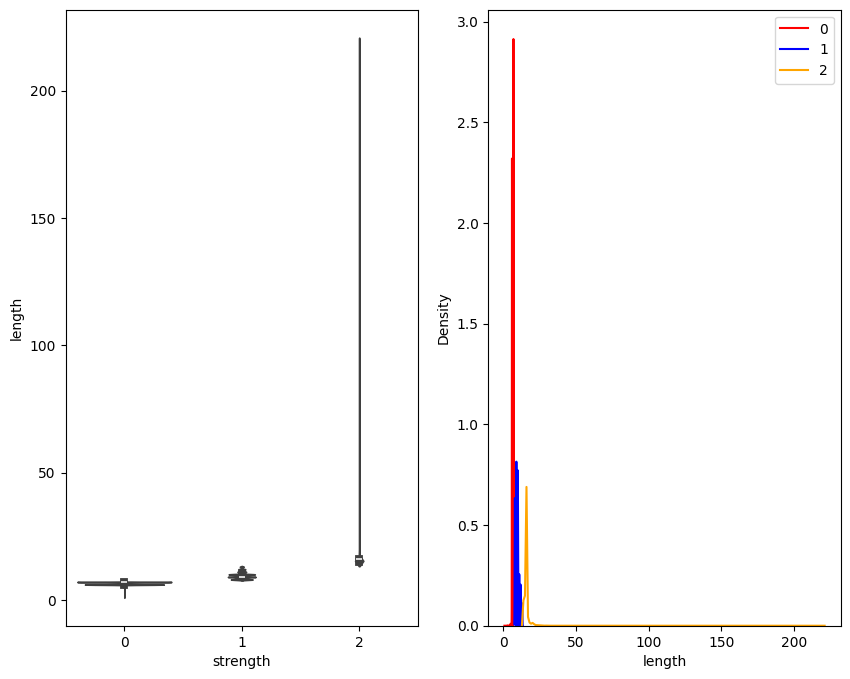

In [48]:
get_dist(data , "length")

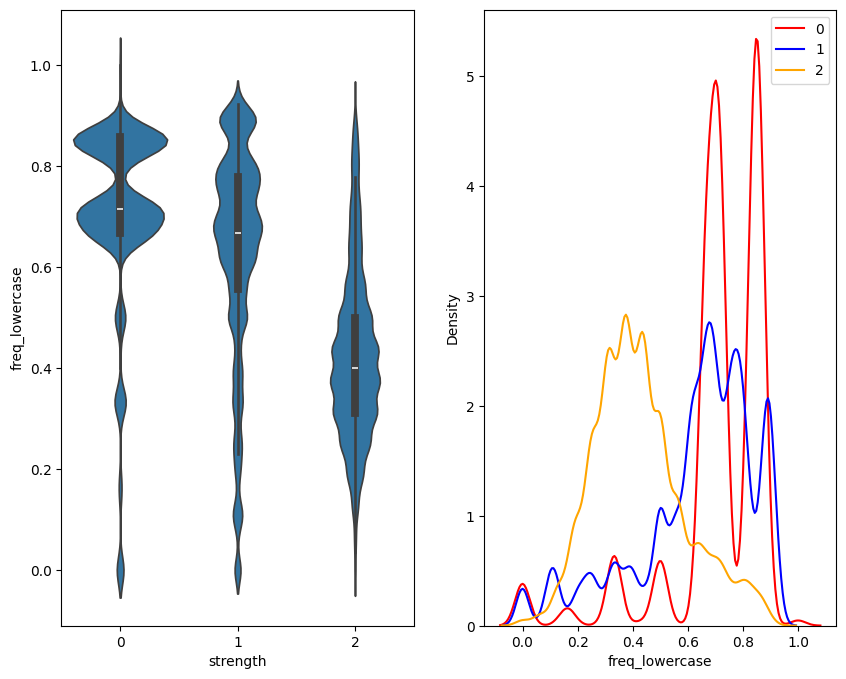

In [49]:
get_dist(data , "freq_lowercase")

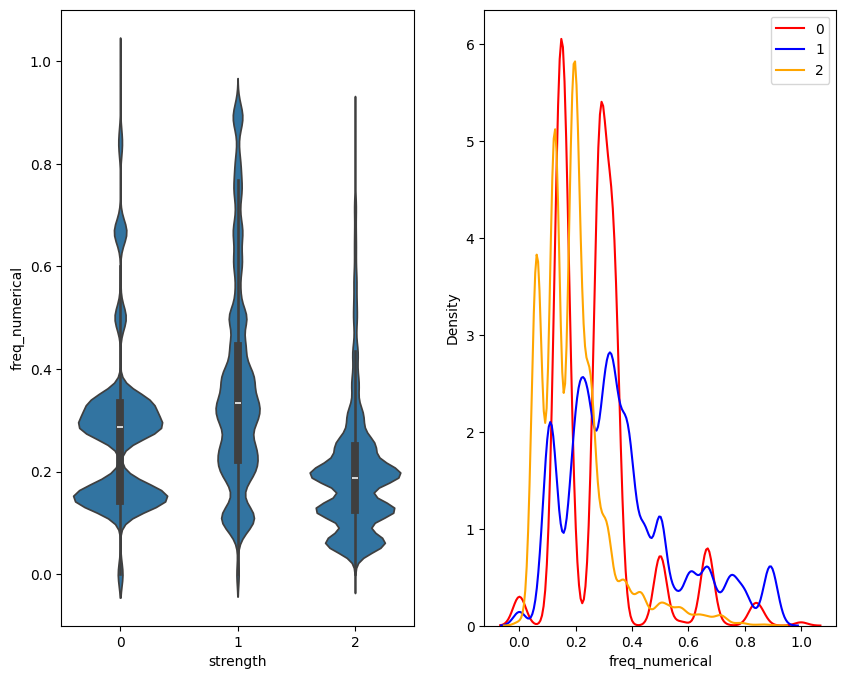

In [50]:
get_dist(data , 'freq_numerical')

In [51]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

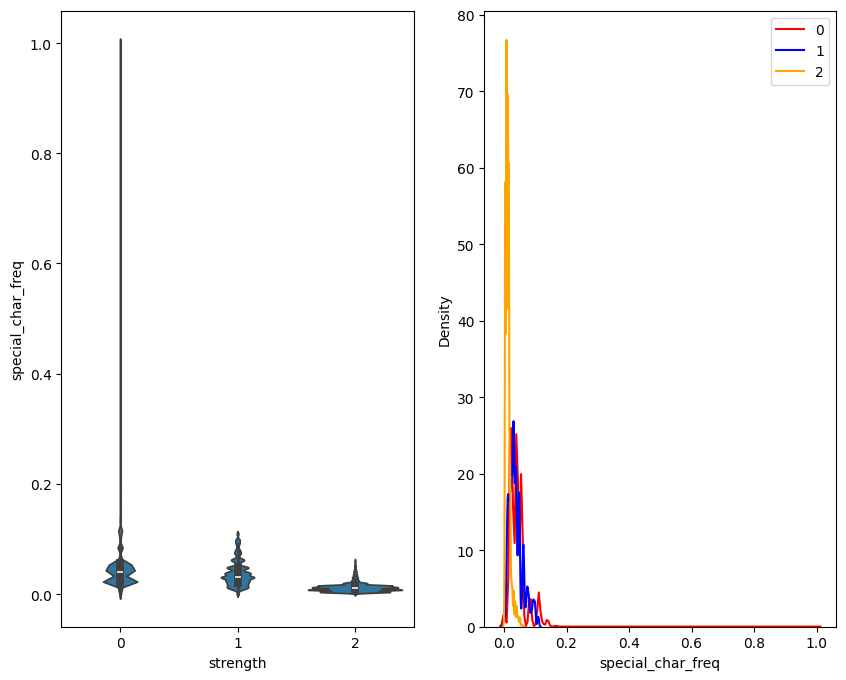

In [52]:
get_dist(data , 'special_char_freq')

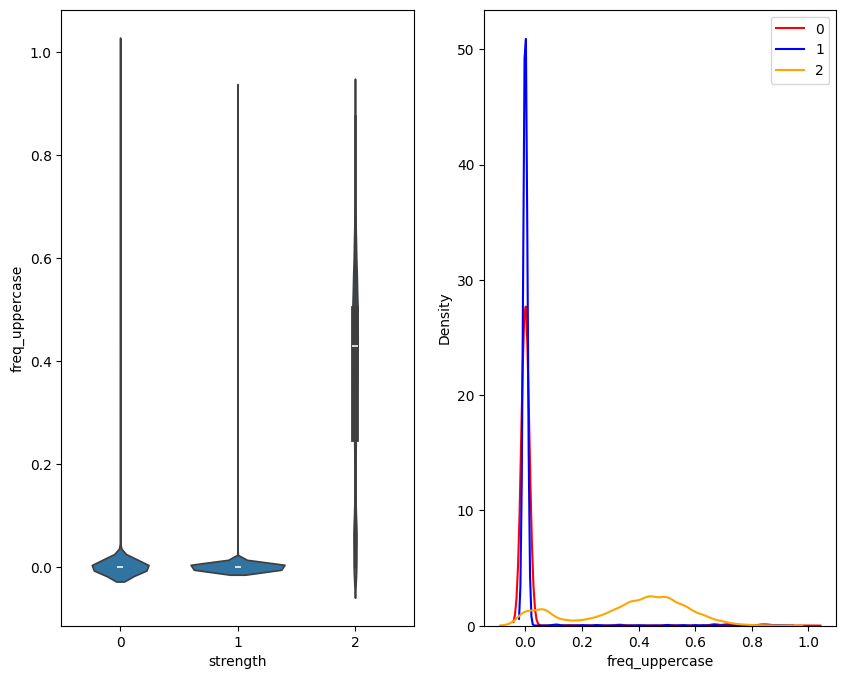

In [53]:
get_dist(data , "freq_uppercase")

In [54]:
#Key Insight : It gives us idea that length & lowercase freq are important features..


In [55]:
data

,password,strength,length,freq_lowercase,freq_uppercase,freq_numerical,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.074111
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.048583
2,soporte13,1,9,0.778,0.0,0.222,0.024667
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.007565
4,c443balg,1,8,0.625,0.0,0.375,0.046875
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.030000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.020000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.024667
99998,mymyxe430,1,9,0.667,0.0,0.333,0.037000


In [56]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel 

In [57]:
dataframe['password']

70197     delores0311
81401     hernandez15
68987    punyarit2527
93324        urmrgay1
5795         mrj12345
             ...     
79283          lost85
95062        viq1ewu6
99856       ukaawuba1
42499      bkqjdfg130
32235      goldfish77
Name: password, Length: 100000, dtype: object

In [58]:
list(dataframe["password"])

['delores0311',
 'hernandez15',
 'punyarit2527',
 'urmrgay1',
 'mrj12345',
 's5ret5',
 'oqyhyve947',
 'renepjdf210',
 'mazad123',
 'samo1984',
 'linda1',
 'david7276',
 'bigky45',
 'TM8cz6jQxNwtpwXY',
 'npfoxp2',
 '123456ajpc',
 'xibebyv133',
 'jamsun0net',
 '08vinsensius',
 'higef671',
 'gukaguka7',
 'tynowota4',
 'ikorad227',
 'parth1992',
 'f5tb4l',
 'theunit69',
 'baucau10a',
 'mimi98',
 'paradai1',
 'zimnicea90',
 'j-r-c-n',
 'v466778899',
 'n0vasenha',
 'barcelona24',
 '949olawORiMapuM',
 'eo4ElYDk3NAqbZUA',
 'holandes1',
 'Sliven448406991',
 'j2fuckbuddies',
 'amw igey1226',
 'newroz214772',
 'blackberry741',
 'deekshith@1995',
 'be4rd1es',
 'uciwim486',
 'viiviiz02',
 '123rahasia',
 'yuliuz92',
 'joseph0829',
 'oquzov644',
 'GjCgenTAyMQ3GaSH',
 'powerwoofer16',
 'bandung2008',
 'tozawy590',
 'saghi147147',
 '123456omer',
 'sanantonio1992|',
 'akosijhay23',
 'c0mdaop',
 'compu10',
 'kwpmieac12',
 'web147258',
 '6ibk2ob1',
 'jifeg823',
 'vlad1990',
 'dreaming5',
 'oscuridad18',
 

In [59]:
x = list(dataframe["password"])

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [61]:
vectorizer = TfidfVectorizer(analyzer="char")

In [62]:
X = vectorizer.fit_transform(x)

In [63]:
X.shape


(100000, 99)

In [64]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
len(vectorizer.get_feature_names_out())

99

In [66]:
vectorizer.get_feature_names_out()


array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [67]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [68]:
dataframe.columns

Index(['password', 'strength', 'length', 'freq_lowercase', 'freq_uppercase',
       'freq_numerical', 'special_char_freq'],
      dtype='object')

In [69]:
df2['length']=dataframe['length']
df2['lowercase_freq']=dataframe['freq_lowercase']

In [70]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [71]:
y = dataframe["strength"]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [74]:
X_train.shape

(80000, 101)

In [75]:
y_train.shape

(80000,)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [78]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [79]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [80]:
y_pred

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [81]:
from collections import Counter

In [82]:
Counter(y_pred)

Counter({1: 16804, 2: 1806, 0: 1390})

In [83]:
#PREDICTION ON SAMPLE DATA

In [84]:
password = "%@123abcd"

In [85]:
sample_array = np.array([password])

In [86]:
sample_matrix = vectorizer.transform(sample_array)

In [87]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [88]:
sample_matrix.toarray().shape


(1, 99)

In [89]:
len(password)

9

In [90]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [91]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [92]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [93]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [94]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [95]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [96]:
### lets Automate it 

In [97]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [98]:
predict()

'Password is weak'

In [99]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [100]:
accuracy_score(y_test , y_pred)

0.80165

In [101]:
confusion_matrix(y_test , y_pred)

array([[  738,  2018,     3],
       [  579, 13849,   357],
       [   73,   937,  1446]], dtype=int64)

In [102]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.27      0.36      2759
           1       0.82      0.94      0.88     14785
           2       0.80      0.59      0.68      2456

    accuracy                           0.80     20000
   macro avg       0.72      0.60      0.64     20000
weighted avg       0.78      0.80      0.78     20000

